In [3]:
print("College Event Feedback Analysis")

College Event Feedback Analysis


In [4]:
print("Welcome, Project Start")

Welcome, Project Start


In [5]:
import pandas as pd
fn=pd.read_csv("student_feedback (1).csv")
print(fn.shape)
fn.head()

(1001, 10)


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [6]:
fn.columns = [c.strip().replace(" ","_").lower() for c in fn.columns]
if "unnamed:_0" in fn.columns:
    fn = fn.drop(columns=['unnamed:_0'])
if 'unnamed:0' in fn.columns:
    fn = fn.drop(columns = ['unnamed:0'])

#Show Final columns and first rows
print("Columns:", list(fn.columns))
print("Shape after cleanup:", fn.shape)
fn.head()


Columns: ['student_id', 'well_versed_with_the_subject', 'explains_concepts_in_an_understandable_way', 'use_of_presentations', 'degree_of_difficulty_of_assignments', 'solves_doubts_willingly', 'structuring_of_the_course', 'provides_support_for_students_going_above_and_beyond', 'course_recommendation_based_on_relevance']
Shape after cleanup: (1001, 9)


,student_id,well_versed_with_the_subject,explains_concepts_in_an_understandable_way,use_of_presentations,degree_of_difficulty_of_assignments,solves_doubts_willingly,structuring_of_the_course,provides_support_for_students_going_above_and_beyond,course_recommendation_based_on_relevance
0,340,5,2,7,6,9,2,1,8
1,253,6,5,8,6,2,1,2,9
2,680,7,7,6,5,4,2,3,1
3,806,9,6,7,1,5,9,4,6
4,632,8,10,8,4,6,6,9,9


In [7]:
#check for nulls and types
print("missing values per column:")
print(fn.isnull().sum())
print("\n Data Types")
print(fn.dtypes)

missing values per column:
student_id                                              0
well_versed_with_the_subject                            0
explains_concepts_in_an_understandable_way              0
use_of_presentations                                    0
degree_of_difficulty_of_assignments                     0
solves_doubts_willingly                                 0
structuring_of_the_course                               0
provides_support_for_students_going_above_and_beyond    0
course_recommendation_based_on_relevance                0
dtype: int64

 Data Types
student_id                                              int64
well_versed_with_the_subject                            int64
explains_concepts_in_an_understandable_way              int64
use_of_presentations                                    int64
degree_of_difficulty_of_assignments                     int64
solves_doubts_willingly                                 int64
structuring_of_the_course                            

In [8]:
# we will assume 'student_id' is an identifier and not a rating.
cols = [c for c in fn.columns if c != 'student_id']

for c in cols:
    fn[c] = pd.to_numeric(fn[c], errors="coerce")
print("Aftter conversion, missing values per column:")
print(fn[cols].isnull().sum())
fn.describe().T


Aftter conversion, missing values per column:
well_versed_with_the_subject                            0
explains_concepts_in_an_understandable_way              0
use_of_presentations                                    0
degree_of_difficulty_of_assignments                     0
solves_doubts_willingly                                 0
structuring_of_the_course                               0
provides_support_for_students_going_above_and_beyond    0
course_recommendation_based_on_relevance                0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
student_id,1001.0,500.000000,289.108111,0.0,250.0,500.0,750.0,1000.0
well_versed_with_the_subject,1001.0,7.497502,1.692998,5.0,6.0,8.0,9.0,10.0
explains_concepts_in_an_understandable_way,1001.0,6.081918,2.597168,2.0,4.0,6.0,8.0,10.0
use_of_presentations,1001.0,5.942058,1.415853,4.0,5.0,6.0,7.0,8.0
degree_of_difficulty_of_assignments,1001.0,5.430569,2.869046,1.0,3.0,5.0,8.0,10.0
solves_doubts_willingly,1001.0,5.474525,2.874648,1.0,3.0,6.0,8.0,10.0
structuring_of_the_course,1001.0,5.636364,2.920212,1.0,3.0,6.0,8.0,10.0
provides_support_for_students_going_above_and_beyond,1001.0,5.662338,2.891690,1.0,3.0,6.0,8.0,10.0
course_recommendation_based_on_relevance,1001.0,5.598402,2.886617,1.0,3.0,6.0,8.0,10.0


In [9]:
cols  = [c for c in fn.columns if c != 'student_id']
print("Summary statitics(mean, max,std,min)")
display(fn[cols].describe().T)

Summary statitics(mean, max,std,min)


,count,mean,std,min,25%,50%,75%,max
well_versed_with_the_subject,1001.0,7.497502,1.692998,5.0,6.0,8.0,9.0,10.0
explains_concepts_in_an_understandable_way,1001.0,6.081918,2.597168,2.0,4.0,6.0,8.0,10.0
use_of_presentations,1001.0,5.942058,1.415853,4.0,5.0,6.0,7.0,8.0
degree_of_difficulty_of_assignments,1001.0,5.430569,2.869046,1.0,3.0,5.0,8.0,10.0
solves_doubts_willingly,1001.0,5.474525,2.874648,1.0,3.0,6.0,8.0,10.0
structuring_of_the_course,1001.0,5.636364,2.920212,1.0,3.0,6.0,8.0,10.0
provides_support_for_students_going_above_and_beyond,1001.0,5.662338,2.891690,1.0,3.0,6.0,8.0,10.0
course_recommendation_based_on_relevance,1001.0,5.598402,2.886617,1.0,3.0,6.0,8.0,10.0


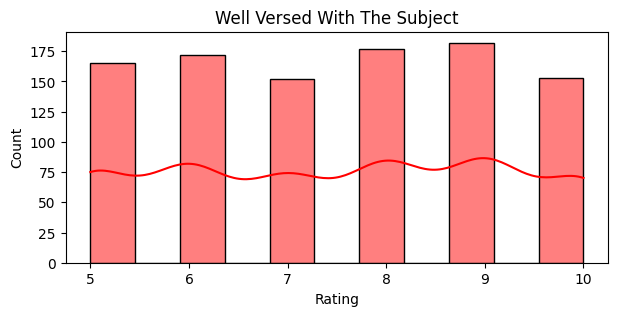

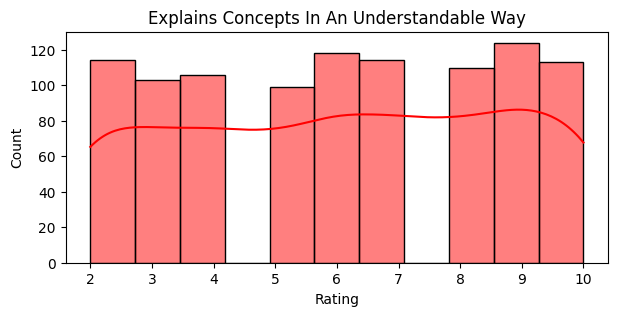

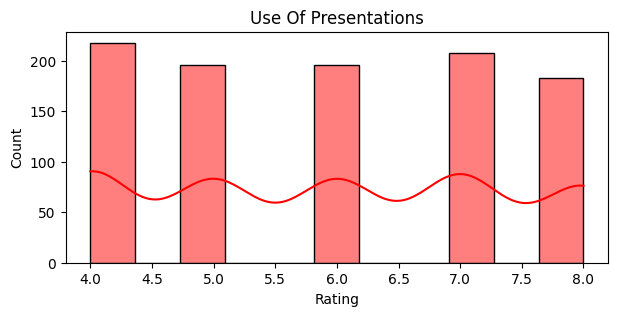

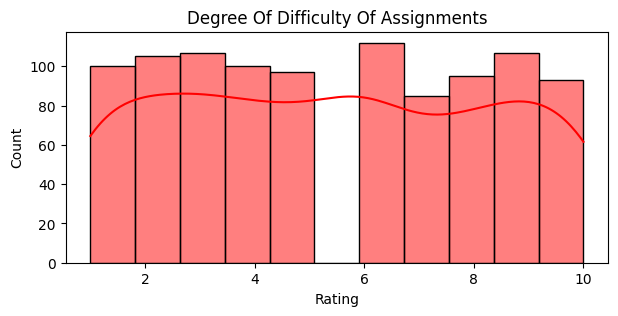

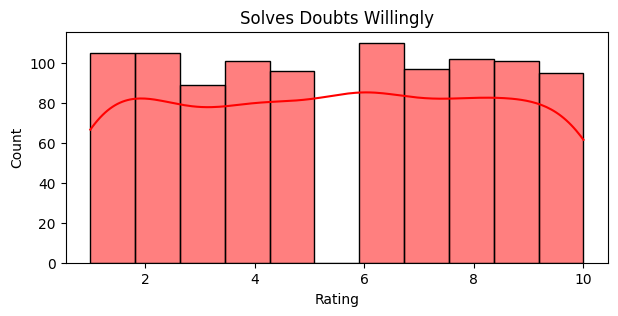

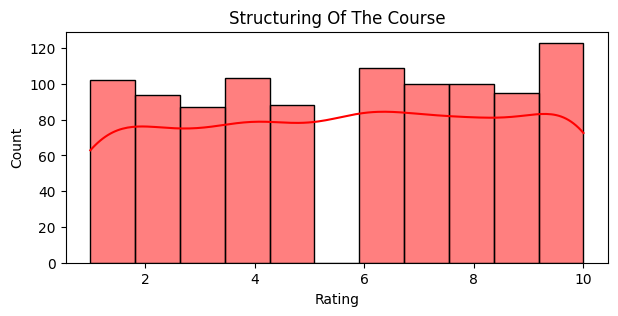

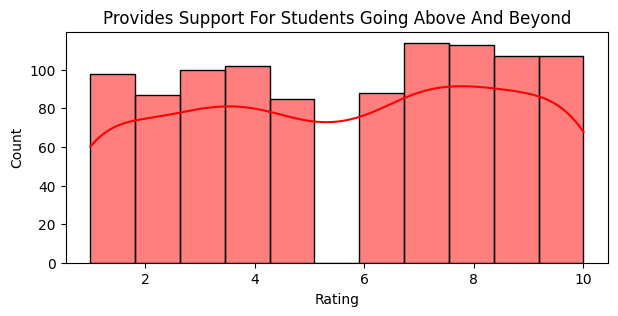

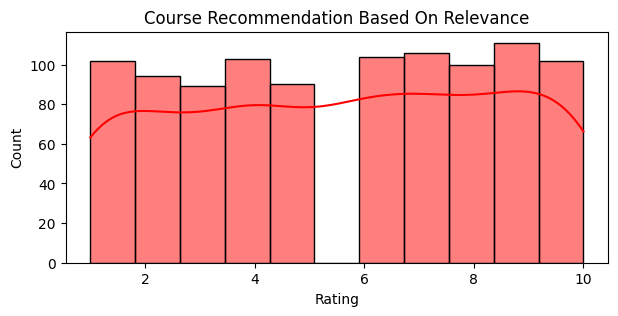

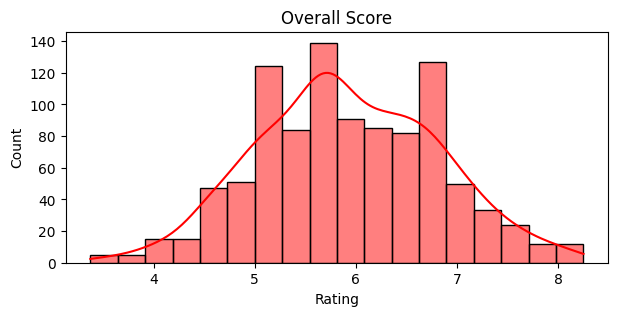

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = [c for c in fn.columns if c != 'student_id' ]
for c in cols:
    plt.figure(figsize=(7,3))
    sns.histplot(fn[c].dropna(),kde=True,color="red")
    plt.title(c.replace("_"," ").title())
    plt.xlabel("Rating")
    plt.show()

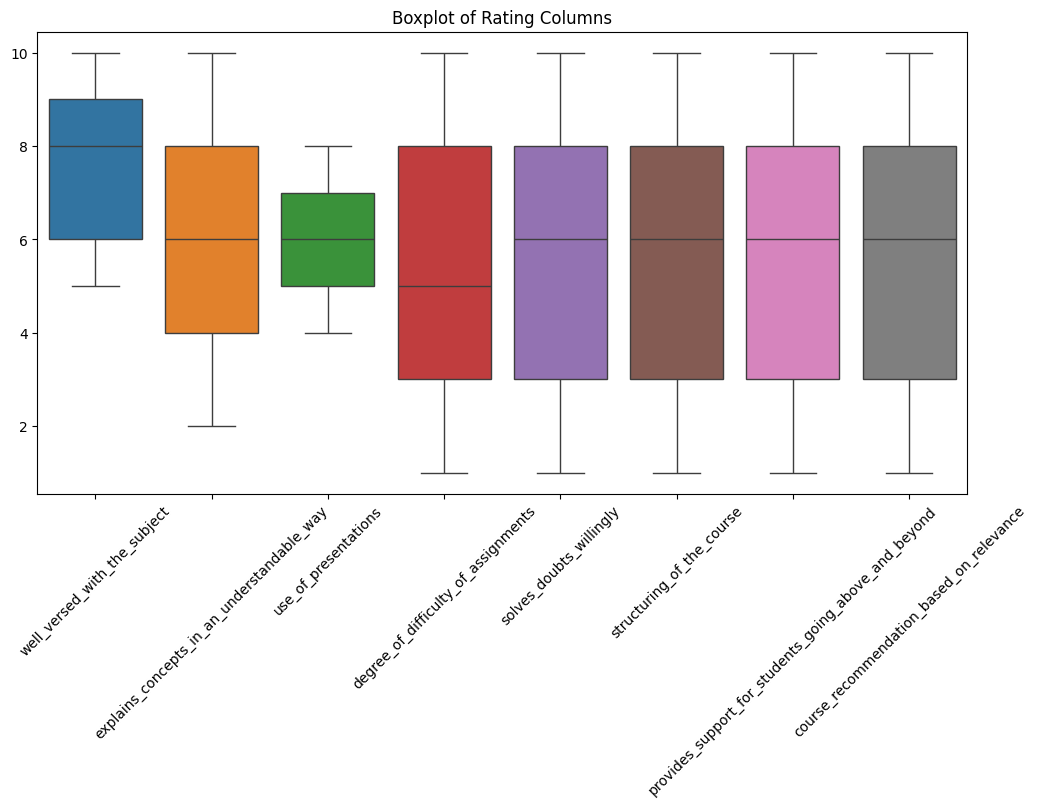

In [11]:
#combined boxplot for comparison
plt.figure(figsize=(12,6))
sns.boxplot(data=fn[cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Rating Columns")
plt.show()

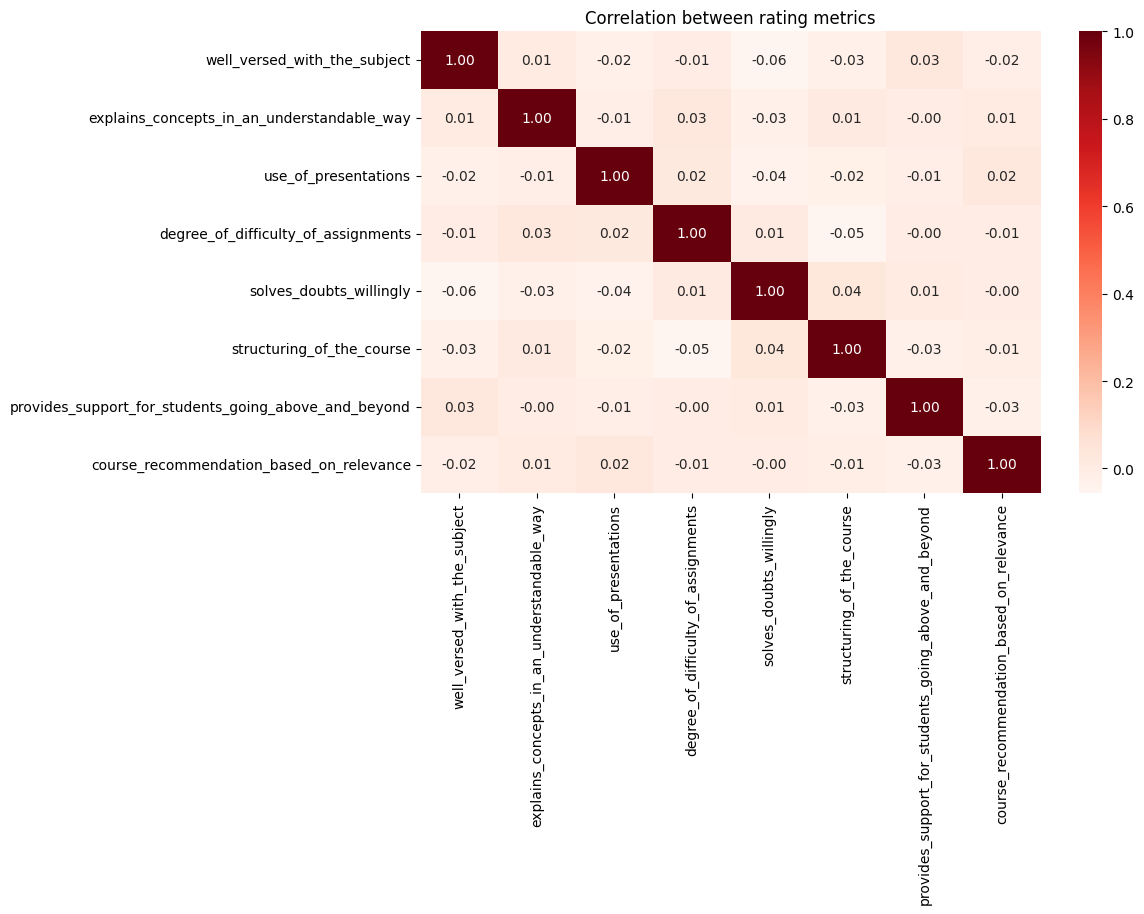

In [13]:
plt.figure(figsize=(10,6))
corr = fn[cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Reds")
plt.title("Correlation between rating metrics")
plt.show()

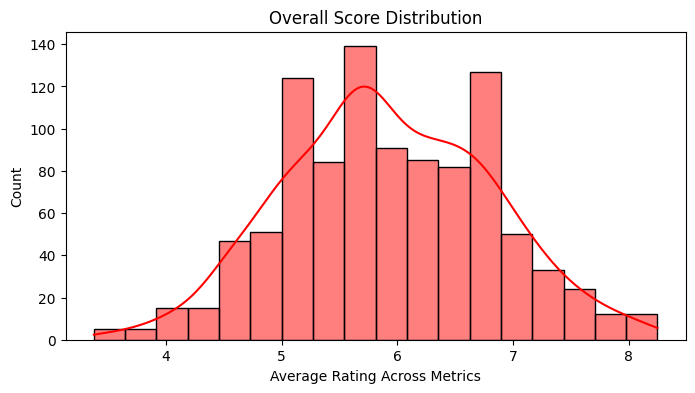

Top 5 students by overall score:


,student_id,overall_score
199,770,8.250
110,188,8.250
692,238,8.250
103,671,8.125
658,269,8.125



Bottom 5 students by overall score:


,student_id,overall_score
644,281,3.375
592,54,3.375
743,724,3.500
285,450,3.625
612,73,3.625


In [15]:
# Cell 10: overall score per student (mean of rating columns)
fn['overall_score'] = fn[cols].mean(axis=1)

plt.figure(figsize=(8,4))
sns.histplot(fn['overall_score'].dropna(), kde=True,color='red')
plt.title("Overall Score Distribution")
plt.xlabel("Average Rating Across Metrics")
plt.show()

# Show top 5 and bottom 5 overall scores
print("Top 5 students by overall score:")
display(fn.sort_values('overall_score', ascending=False).head()[['student_id','overall_score'] + cols[:0]])
print("\nBottom 5 students by overall score:")
display(fn.sort_values('overall_score', ascending=True).head()[['student_id','overall_score']])

Mean rating by metric:


well_versed_with_the_subject                            7.497502
explains_concepts_in_an_understandable_way              6.081918
use_of_presentations                                    5.942058
provides_support_for_students_going_above_and_beyond    5.662338
structuring_of_the_course                               5.636364
course_recommendation_based_on_relevance                5.598402
solves_doubts_willingly                                 5.474525
degree_of_difficulty_of_assignments                     5.430569
dtype: float64

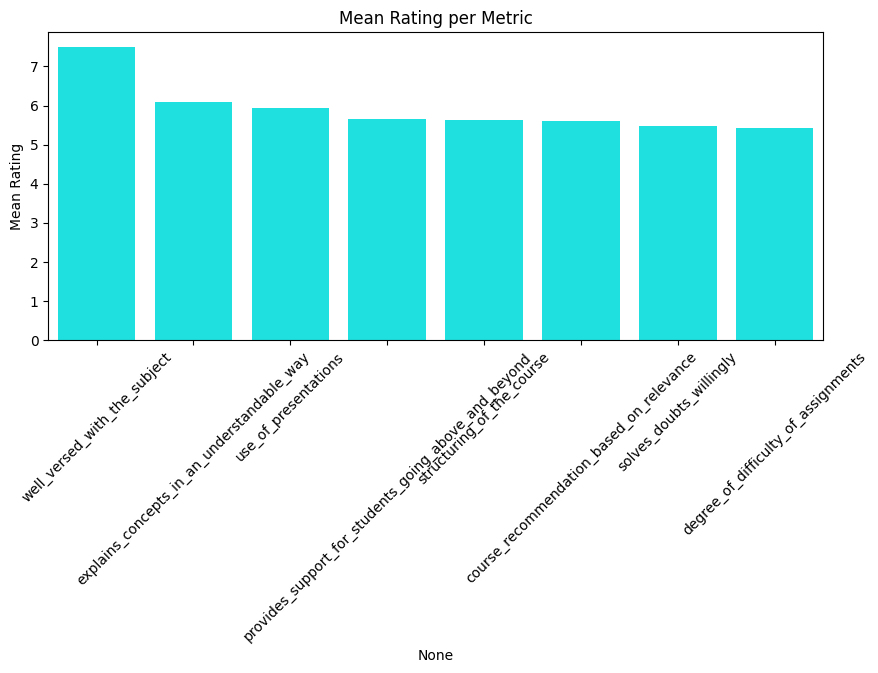

In [18]:
# mean rating by metric
means = fn[cols].mean().sort_values(ascending=False)
print("Mean rating by metric:")
display(means)

plt.figure(figsize=(10,4))
sns.barplot(x=means.index, y=means.values,color='aqua')
plt.xticks(rotation=45)
plt.ylabel("Mean Rating")
plt.title("Mean Rating per Metric")
plt.show()

In [21]:
#save results for download in Colab
summary_table = pd.DataFrame({
    'metric': means.index,
    'mean_rating': means.values,
    'std_rating': fn[cols].std().reindex(means.index).values
})
summary_table.to_csv('metric_summary.csv', index=False)
fn.to_csv('annotated_student_feedback.csv', index=False)
print(summary_table)

print("Saved files: metric_summary.csv and annotated_student_feedback.csv")

                                              metric  mean_rating  std_rating
0                       well_versed_with_the_subject     7.497502    1.692998
1         explains_concepts_in_an_understandable_way     6.081918    2.597168
2                               use_of_presentations     5.942058    1.415853
3  provides_support_for_students_going_above_and_...     5.662338    2.891690
4                          structuring_of_the_course     5.636364    2.920212
5           course_recommendation_based_on_relevance     5.598402    2.886617
6                            solves_doubts_willingly     5.474525    2.874648
7                degree_of_difficulty_of_assignments     5.430569    2.869046
Saved files: metric_summary.csv and annotated_student_feedback.csv
